In [1]:
import pandas as pd
import bt

In [2]:
data = bt.get('aapl, msft, c, gs, ge', start='2010-01-01')
data

,aapl,msft,c,gs,ge
Date,,,,,
2009-12-31,6.452591,23.585043,28.491796,141.783188,85.995628
2010-01-04,6.553027,23.948725,29.266487,145.343704,87.814430
2010-01-05,6.564354,23.956448,30.385506,147.913315,88.269112
2010-01-06,6.459939,23.809441,31.332355,146.334656,87.814430
2010-01-07,6.447999,23.561829,31.418430,149.198166,92.361443
...,...,...,...,...,...
2021-11-10,147.919998,330.799988,68.209999,399.119995,108.959999
2021-11-11,147.869995,332.429993,68.870003,402.339996,107.000000
2021-11-12,149.990005,336.720001,69.160004,404.910004,107.589996


In [4]:
sma = data.rolling(50).mean()
sma

,aapl,msft,c,gs,ge
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-10,147.265598,305.6298,69.919213,400.4128,104.249227
2021-11-11,147.177244,306.2418,69.880675,400.1864,104.317638
2021-11-12,147.108522,306.9532,69.844164,399.9946,104.345889


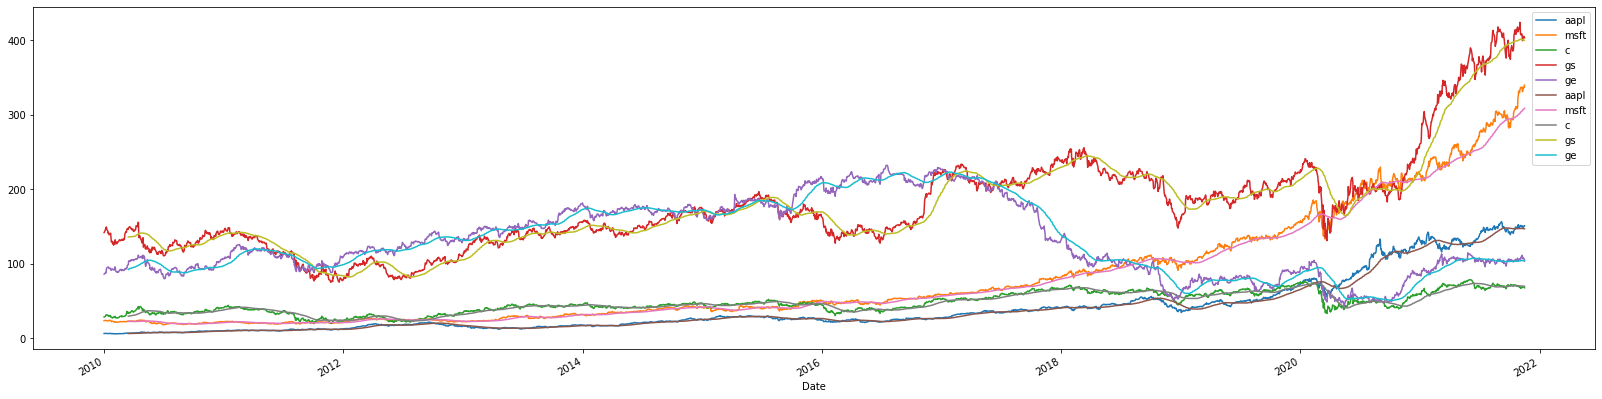

In [9]:
%matplotlib inline
plot = bt.merge(data, sma).plot(figsize=(28, 7))

In [10]:
class SelectWhere(bt.Algo):
    
    """
    Selects securities where the value is True on the current date (target.now).
    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)
    Sets:
        * selected
    """
    
    def __init__(self, signal):
        self.signal = signal
    
    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]
            
            # get indices where true as list
            selected = list(sig.index[sig])
            
            # save in temp : weighing algo
            target.temp['selected'] = selected
        # return true because we want to keep on moving down the stack
        return True

In [11]:
s = bt.Strategy(
    'above50sma', 
    [
        SelectWhere(data > sma), 
        bt.algos.WeighEqually(), 
        bt.algos.Rebalance()
    ]
)

t = bt.Backtest(s, data)
res = bt.run(t)

<AxesSubplot:title={'center':'Equity Progression'}>

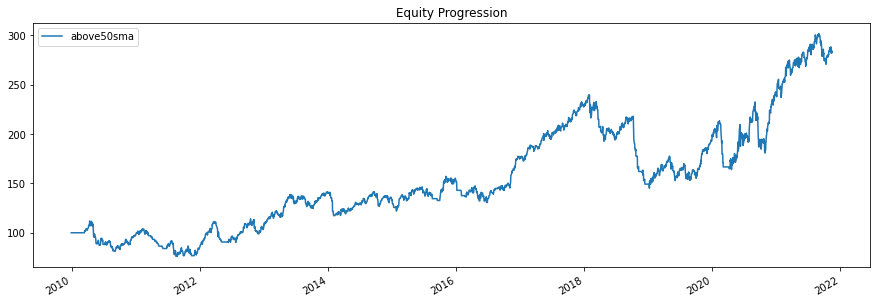

In [12]:
res.plot()

In [ ]:
class WeighTarget(bt.Algo):
    
    """
        Sets target weights based on a target weight DataFrame.
    Args:
        * target_weights (DataFrame): DataFrame containing the target weights
    Sets:
        * weights
    """
    
    def __init__(self, target_weights):
        self.tw = target_weights
    
    def __call__(self, target):
        # get target weights on date target.now
        
        if target.now

In [ ]:
bt.Algo

In [16]:
data = bt.get('spy,agg', start='2010-01-01')